# BLG-307 YAPAY ZEKA SİSTEMLERİ - PROJE ÖDEVİ 1

**Senaryo 1:** Güneş Paneli Yerleşiminde Optimum Eğim ve Yön

**Öğrencinin Adı:** ESRA

**Soyadı:** GÖGEBAKAN

**Okul Numarası:** 2212721001

**GitHub Repo Bağlantısı:** https://github.com/esra03-1/Gunes-Paneli-Yerlesimi_Genetik_Proje.git

En iyi çözüm: [14.96853855 90.        ]
Enerji: 427.40551665319043


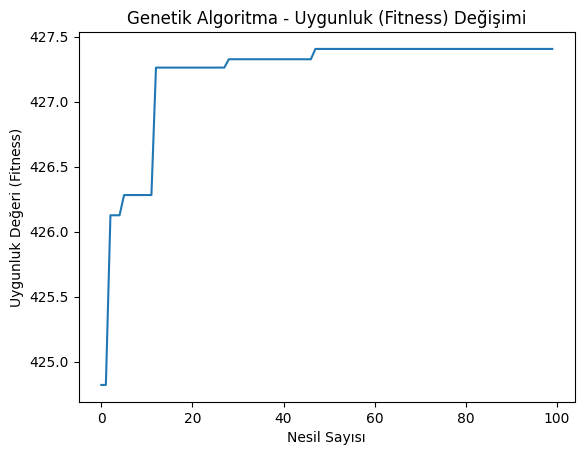

In [6]:
import numpy as np
import random
import matplotlib.pyplot as plt

# ================================
# 1️⃣ ALGORİTMA AYARLARI
# ================================

POPULASYON_BOYUTU = 50      # Aynı anda kaç çözüm denenecek
NESIL_SAYISI = 100          # Kaç kere iyileştirme yapılacak
MUTASYON_IHTIMALI = 0.2     # Bir çözümün bozulma ihtimali (%20)
MUTASYON_BUYUKLUGU = 2.0    # Bozulursa en fazla kaç derece oynasın
CEZA_KATSAYISI = 50         # Kısıt ihlali varsa ceza

# ================================
# 2️⃣ DEĞİŞKEN SINIRLARI
# ================================

# [min, max]
LIMITLER = np.array([
    [10, 45],   # eğim
    [0, 90]     # yön
])

# ================================
# 3️⃣ AMAÇ FONKSİYONU
# ================================

def amac_fonksiyonu(cozum):
    """
    cozum = [x1, x2]
    x1 = eğim
    x2 = yön
    """
    egim = cozum[0]
    yon = cozum[1]

    enerji = 6*egim + 4*yon - 0.1*(egim**2)
    return enerji

# ================================
# 4️⃣ KISIT KONTROLÜ
# ================================

def kisit_kontrol(cozum):
    ihlal = 0

    egim = cozum[0]
    yon = cozum[1]

    # Fiziksel sınır
    if egim + 0.5*yon > 60:
        ihlal += 1

    # Minimum yön şartı
    if yon < 15:
        ihlal += 1

    return ihlal

# ================================
# 5️⃣ UYGUNLUK (FITNESS)   ->  Fitness = Kazanç − Ceza
# ================================

def uygunluk_hesapla(cozum):
    enerji = amac_fonksiyonu(cozum)
    ceza = kisit_kontrol(cozum) * CEZA_KATSAYISI
    return enerji - ceza

# ================================
# 6️⃣ SEÇİM (RULET)
# ================================

def rulet_secimi(populasyon, uygunluklar):
    min_deger = np.min(uygunluklar)

    if min_deger < 0:
        uygunluklar = uygunluklar - min_deger + 1

    olasiliklar = uygunluklar / np.sum(uygunluklar)

    secilen_index = np.random.choice(
        len(populasyon),
        p=olasiliklar
    )

    return populasyon[secilen_index]

# ================================
# 7️⃣ ÇAPRAZLAMA
# ================================

def caprazlama(anne, baba):
    # [anne_eğim, baba_yön]
    cocuk1 = np.array([anne[0], baba[1]])
    cocuk2 = np.array([baba[0], anne[1]])
    return cocuk1, cocuk2

# ================================
# 8️⃣ MUTASYON
# ================================

def mutasyon(cozum):
    yeni = cozum.copy()

    for i in range(2):
        if np.random.rand() < MUTASYON_IHTIMALI:
            degisim = np.random.uniform(-MUTASYON_BUYUKLUGU,
                                         MUTASYON_BUYUKLUGU)
            yeni[i] += degisim
            yeni[i] = np.clip(yeni[i],
                              LIMITLER[i,0],
                              LIMITLER[i,1])
    return yeni

# ================================
# 9️⃣ ANA ALGORİTMA
# ================================

def genetik_algoritma():

    populasyon = np.random.uniform(
        [10, 0],  #eğim en az 10 - yön en az 0
        [45, 90], #eğim en fazla 45 - yön en fazla 90
        (POPULASYON_BOYUTU, 2)
    )

    en_iyi_degerler = []

    for nesil in range(NESIL_SAYISI):

        uygunluklar = np.array([
            uygunluk_hesapla(b) for b in populasyon
        ])

        en_iyi = populasyon[np.argmax(uygunluklar)]  #np.argmax → en büyük değerin indeksi YANİ    POPÜLASYONDAKİ → en iyi eğim,yön
        en_iyi_degerler.append(np.max(uygunluklar))

        yeni_pop = [en_iyi]

        while len(yeni_pop) < POPULASYON_BOYUTU:
            anne = rulet_secimi(populasyon, uygunluklar)
            baba = rulet_secimi(populasyon, uygunluklar)

            cocuk1, cocuk2 = caprazlama(anne, baba)

            cocuk1 = mutasyon(cocuk1)
            cocuk2 = mutasyon(cocuk2)

            yeni_pop.extend([cocuk1, cocuk2])

        populasyon = np.array(yeni_pop[:POPULASYON_BOYUTU])

    print("En iyi çözüm:", en_iyi)
    print("Enerji:", amac_fonksiyonu(en_iyi))

    plt.plot(en_iyi_degerler)
    plt.title("Genetik Algoritma - Uygunluk (Fitness) Değişimi")
    plt.xlabel("Nesil Sayısı")
    plt.ylabel("Uygunluk Değeri (Fitness)")
    plt.show()

genetik_algoritma()
